# Customer Churn Analysis – EDA

In [3]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#Load the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")



In [13]:
#Preview the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
#Check dataset shape (rows, columns)
df.shape

(7043, 21)

In [16]:
#Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
#Check for missing values in all columns
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
#Convert TotalCharges from text to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
#Handle missing values in TotalCharges
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [23]:
# Convert TotalCharges from object to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values after conversion
print(df['TotalCharges'].isnull().sum())

# Fill missing values with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


0


In [24]:
# convert churn column to numeric
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# verify churn values
df['Churn'].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

In [26]:
# identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


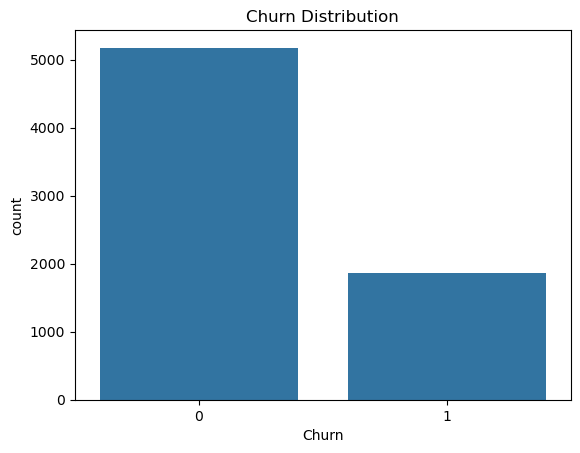

In [27]:
# plot churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


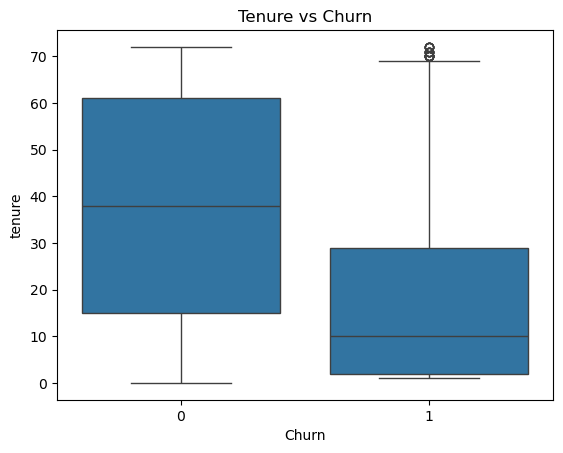

In [28]:
# analyze tenure vs churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()


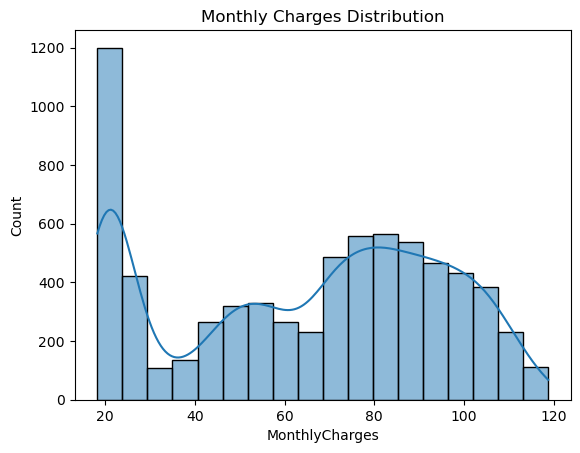

In [29]:
# analyze monthly charges distribution
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Monthly Charges Distribution')
plt.show()


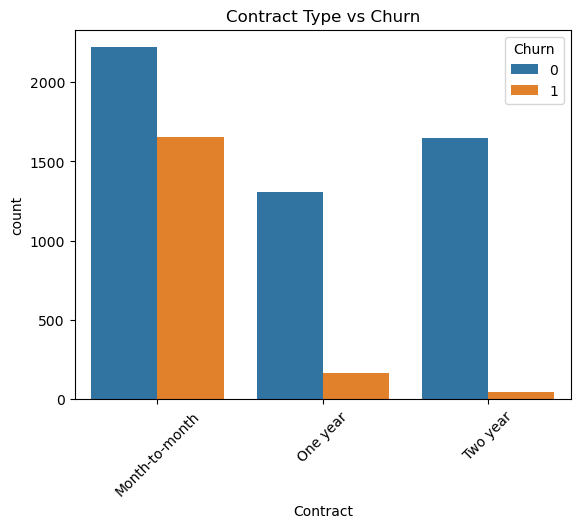

In [30]:
# analyze contract type vs churn
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.title('Contract Type vs Churn')
plt.show()


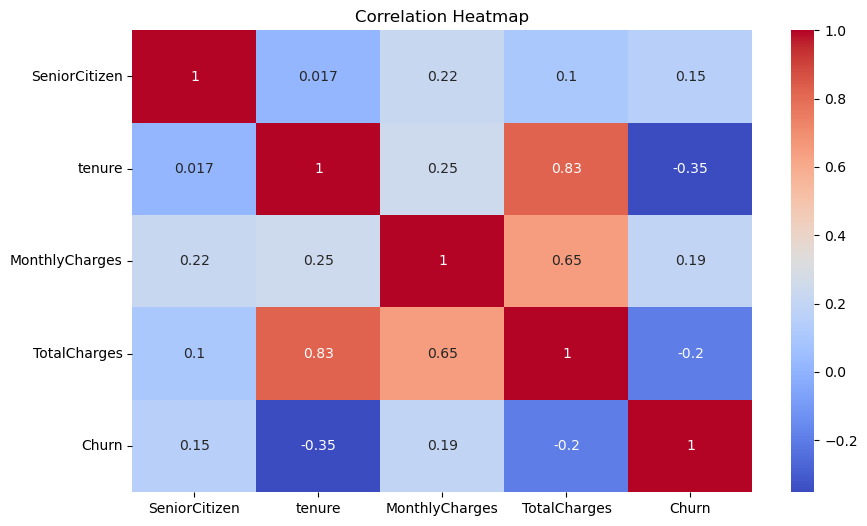

In [31]:
# plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Insights

Customer churn is lower than retention, indicating a class imbalance in the target variable.

Customers with shorter tenure are significantly more likely to churn than long-term customers.

Month-to-month contracts show the highest churn compared to one-year and two-year contracts.

Higher monthly charges are associated with increased churn probability.

Missing TotalCharges values were observed for new customers with zero tenure and were handled during data cleaning.

Tenure shows a negative correlation with churn, while monthly charges show a positive correlation.

In [34]:
# export cleaned dataset for power bi
df.to_csv("clean_telco_churn.csv", index=False)
